In [1]:
import optimizer_env as st
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline  

env = st.StrOptEnv()

env.reset()

print(env.border_ang*180/np.pi)

29.571314963106314


Error is not valid!: -2147.659764776995
[ 2.65898414e-14 -9.18975406e-04 -1.84734861e-03 -2.78541503e-03
 -3.73348592e-03 -4.69188951e-03 -5.66097239e-03 -6.64110096e-03
 -7.63266306e-03 -8.63606976e-03 -9.65175735e-03 -1.06801896e-02
 -1.17218601e-02 -1.27772953e-02 -1.38470574e-02 -1.49317480e-02
 -1.60320118e-02 -1.71485415e-02 -1.82820825e-02 -1.94334392e-02
 -2.06034812e-02 -2.17931513e-02 -2.30034743e-02 -2.42355674e-02
 -2.54906523e-02 -2.67700693e-02 -2.80752943e-02 -2.94079587e-02
 -3.07698732e-02 -3.21630568e-02 -3.35897723e-02 -3.50525688e-02
 -3.65543362e-02 -3.80983715e-02 -3.96884647e-02 -4.13290087e-02
 -4.30251418e-02 -4.47829392e-02 -4.66096697e-02 -4.85141537e-02
 -5.05072695e-02 -5.26026967e-02 -5.48180431e-02 -5.71766329e-02
 -5.97105011e-02 -6.24657677e-02 -6.55132176e-02 -6.89720090e-02
 -7.30744830e-02 -7.84204796e-02]
[0.03331798 8.74523639 8.73444341 8.72365721 8.71287474 8.70209291
 8.6913086  8.68051867 8.66971991 8.65890906 8.64808278 8.63723763
 8.62637009 

TOTAL REWARD:


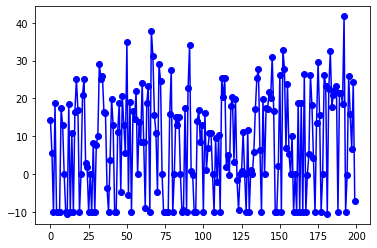

In [8]:
tot_rews = []

for k in range (200):
    env.reset()
    total_reward = 0
    rews = []
    actions = []
    errors = []
    states = []
    count = 0
    for i in range(100):
        count += 2
        #print(count)
        #act = 2
        act = np.random.randint(0,9)
        
        actions.append(act)
        #valami = env.reset()
        #env.reset()            
        val = env.step(act)
        #print('reward: ',val[1])
        #print('done: ',val[2])
        
        total_reward += val[1]
        
        rews.append(total_reward)
        errors.append(env.error)
        states.append(env.state)
        
        if val[2]:
            break
        
    #valami = env.step(act)[0]
    #env.save_plot(env.check_error, env.check_r)
    #plt.plot([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])
    #plt.show
    #print(i,'error_mod' , env.check_error)
    #print(i,'r_array_mod', env.check_r)

    #plt.show()

    #print(env.state)

    #print(env.rack_travel)
    #print('total_reward: ', total_reward)
    
    #plt.plot(np.sort(np.asarray(actions), axis=None))
    
    #plt.figure()
    #print('TOTAL REWARD:')
    #plt.plot(rews, 'bo-')
    
    tot_rews.append(total_reward)

plt.figure()
print('TOTAL REWARD:')
plt.plot(tot_rews, 'bo-')


In [ ]:
plt.figure()
print('ERRORS:')
plt.plot(errors, 'bo-')

Error is not valid!: -1253.1156854990538
[ 0.         -0.00094859 -0.00188804 -0.00281862 -0.00374058 -0.00465416
 -0.00555958 -0.00645707 -0.00734683 -0.00822906 -0.00910395 -0.00997169
 -0.01083244 -0.01168639 -0.01253368 -0.01337449 -0.01420894 -0.0150372
 -0.01585939 -0.01667565 -0.01748612 -0.01829091 -0.01909014 -0.01988393
 -0.02067239 -0.02145562 -0.02223375 -0.02300685 -0.02377504 -0.0245384
 -0.02529702 -0.02605101 -0.02680043 -0.02754538 -0.02828593 -0.02902217
 -0.02975417 -0.030482   -0.03120574 -0.03192545 -0.03264121 -0.03335307
 -0.03406111 -0.03476538 -0.03546595 -0.03616287 -0.03685621 -0.03754601
 -0.03823234 -0.03891524]
[5.04870979e-29 9.86966709e+00 9.86985510e+00 9.87016849e+00
 9.87060751e+00 9.87117262e+00 9.87186445e+00 9.87268385e+00
 9.87363189e+00 9.87470984e+00 9.87591919e+00 9.87726169e+00
 9.87873932e+00 9.88035434e+00 9.88210928e+00 9.88400699e+00
 9.88605064e+00 9.88824374e+00 9.89059021e+00 9.89309438e+00
 9.89576105e+00 9.89859553e+00 9.90160370e+00 

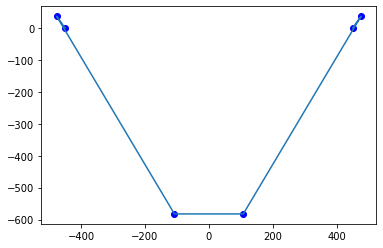

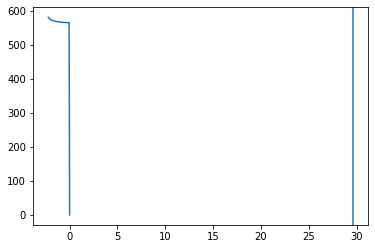

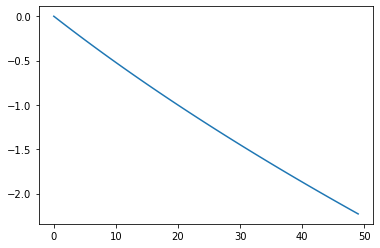

In [12]:
val = [-107.72086045066183, -582.2397754986916, -476.08961189227915, 36.597884419336005]
#val = solution.x
#val = states[0]

plt.plot([env.KPLX, val[2], val[0], -val[0], -val[2], -env.KPLX], [env.KPLY, val[3], val[1], val[1], val[3], env.KPLY], 'bo')
plt.plot([env.KPLX, val[2], val[0], -val[0], -val[2], -env.KPLX], [env.KPLY, val[3], val[1], val[1], val[3], env.KPLY])
plt.axis('equal')

env.state = val

env.step(1)

#print('error: ', env.error)

plt.figure()
plt.plot(env.check_r*180/np.pi, env.check_error*180/np.pi)
plt.axvline(x=env.border_ang / np.pi * 180)
#plt.axis([-2, (env.border_ang / np.pi * 180) + 1, 0, 3])


#print(env.check_r*180/np.pi)
print(env.rack_travel)

plt.figure()
plt.plot(env.check_r*180/np.pi)

#print(env.check_r/np.pi*180)
#print(env.check_error/np.pi*180)

In [ ]:
solution = env.geometry_optimize()
print(solution)

arm = np.sqrt((solution.x[2] - env.KPLX)**2 + (solution.x[3] - env.KPLY)**2)

angle = np.arctan2(solution.x[3] - env.KPLY, solution.x[2] - env.KPLX)
print('ARM: ',arm)
print('Angle: ',angle*180/np.pi)
print('Travel: ',env.rack_travel)

In [ ]:
val = solution.x
#val = env.state

plt.plot([env.KPLX, val[2], val[0], -val[0], -val[2], -env.KPLX], [env.KPLY, val[3], val[1], val[1], val[3], env.KPLY], 'bo')
plt.plot([env.KPLX, val[2], val[0], -val[0], -val[2], -env.KPLX], [env.KPLY, val[3], val[1], val[1], val[3], env.KPLY])
plt.axis('equal')

env.state = solution.x

env.step(0)

print('error: ', env.error)

plt.figure()
plt.plot(env.check_r*180/np.pi, env.check_error*180/np.pi)
plt.axvline(x=env.border_ang / np.pi * 180)
plt.axis([10, (env.border_ang / np.pi * 180) + 1, 0, 2])

print(env.check_r*180/np.pi)
print(env.rack_travel)

plt.figure()
plt.plot(env.check_r)

In [ ]:
print(env.reset())

for i in range(env.action_space.n):
    print(env.step(i))
    print(env.error)


#reward = np.array([])

total_reward = 0

actions = []


In [ ]:
print(env.check_error)
print(env.check_r)

print(np.trapz(env.check_error, env.check_r))

plt.plot(env.check_r)

print(env.border_ang)

In [ ]:
print(env.state)
#plt.plot([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])
print([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])
env.step(2)[0]
#plt.plot([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])
print([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

#plt.plot(env.b0_array + env.KPLX, env.b1_array + env.KPLY)
#plt.plot(env.b2_array + env.KPLX, env.b3_array + env.KPLY)
#plt.plot(env.b4_array + env.KPLX, env.b5_array)
#plt.plot(env.b6_array + env.KPLX, env.b7_array)

#plt.plot([env.KPLX, env.Ax0, env.Dx, -env.Dx], [env.KPLY, env.Ay0, env.Dy, env.Dy])
#plt.plot(env.z_array, env.b1_array/np.pi*180)
#plt.plot(np.flip(env.z_array, 0), env.r_array/2/np.pi*180)
plt.plot(reward)
#plt.axis('equal')
plt.show()

In [ ]:
plt.plot(env.x_array, env.r_array/np.pi*180)
plt.plot(env.x_array, env.l_array/np.pi*180)
plt.plot(env.x_array, env.k_array/np.pi*180)


In [ ]:
print(env.k_array[0]/np.pi*180)
print(env.r_array[0]/np.pi*180)

In [ ]:
env.k_array

In [ ]:
plt.plot(env.r_array, (env.l_array - env.r_array))
plt.plot(env.r_array, (env.k_array - env.r_array))

In [ ]:
plt.plot(env.r_array, ((env.k_array - env.l_array)**2))

In [ ]:
env.tr_eval

In [ ]:
env.error

In [ ]:
import timeit
import numpy as np

start = timeit.default_timer()

o = np.empty([])
oo = np.empty([])

i = 1
for i in range(100):
    env.step(-100 + 2*i)
    o = np.append(o, env.error)
    oo = np.append(oo, env.error_orig)
    
    plt.plot(env.r_array/np.pi*180, env.error_array/np.pi*180)
    plt.axvline(x=env.border_ang/np.pi*180)
    i += 1
    
stop = timeit.default_timer()
print('Time: ', stop - start)

plt.figure()
plt.plot(o[1:], '.')
plt.plot(oo[1:], '.')




In [ ]:
env.border_ang/np.pi*180

In [ ]:
env.step(0)

In [ ]:
len(env.error_array)

In [ ]:
len(env.r_array)

In [ ]:
np.trapz(env.error_array, env.r_array)

In [ ]:
plt.figure()
plt.plot(env.r_array[0:len(env.error_array)-env.int_chk], o[1:len(env.error_array)-env.int_chk+1], '.')
plt.plot(env.r_array, oo[1:], '.')




In [ ]:
env.int_chk

In [ ]:
plt.plot(env.r_array/np.pi*180, env.error_array/np.pi*180)
plt.axvline(x=env.border_ang/np.pi*180)

In [ ]:
result = {
  'a': lambda x: env.Dx = env.Dx + x,
  'b': lambda x: x + 7,
}['a'](5)

In [ ]:
from scipy.interpolate import interp1d

import numpy as np
x = np.array([0.5156312644066778, 0.526040469557302])
y = np.array([0.007969681162248856, 0.0154360504511115])

f = interp1d(x,y)



In [ ]:
def angle_chop(angle):
    chop = (angle*180/np.pi) % (np.sign(angle)*180)*np.pi/180
    real = -np.sign(angle)*np.pi + chop
    return real

In [ ]:
ang = -185 / 180 * np.pi

print((ang *180 / np.pi) % (np.sign(ang)*180))
print(np.sign(ang)*180)
print(ang)

In [ ]:
angle_chop(ang)/np.pi*180